# DESCRIPTION
Abalone is a mollusc with a peculiar ear-shaped shell lined of mother of pearl. Its age can be estimated counting the number of rings in their shell with a microscope, but it is a time consuming process, in this tutorial we will use Machine Learning to predict the age using physical measurements.

# Objective:
    The objective of this project is to predicting the age of abalone from physical measurements 
    using the 1994   abalone data "The Population Biology of Abalone (Haliotis species) in Tasmania. I.
    Blacklip Abalone (H.rubra) from the North Coast and Islands of Bass Strait".
    

# Key insights :

        - No missing values in the dataset
        - All float data type but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range
        

# REGRESSION ALGORITHMS USED:
* Linear Regression
* Decision Tree Regressor
* Support Vector Regressor

# CLASSIFICATION ALGORITHMS USED:
* Logistic Regression
* K-Nearest Neighbour
* Support Vector Classifier
* Decision Tree Classifier
* Ada Boosting Classifier
* Gradient Boosting Classifier

In [6]:
#It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rajat.sharma\Downloads\Codes\Streamlit\abalone.csv")

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.shape

(4177, 9)

In [12]:
df["age"] = df["Rings"] + 1.5
#df.drop("Rings",axis = 1, inplace = True)

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
age               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [16]:
df.var()

C:\Users\rajat.sharma\AppData\Local\Temp\ipykernel_22952\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
age               10.395266
dtype: float64

# Data Visualisation :

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

<AxesSubplot:xlabel='Sex', ylabel='count'>

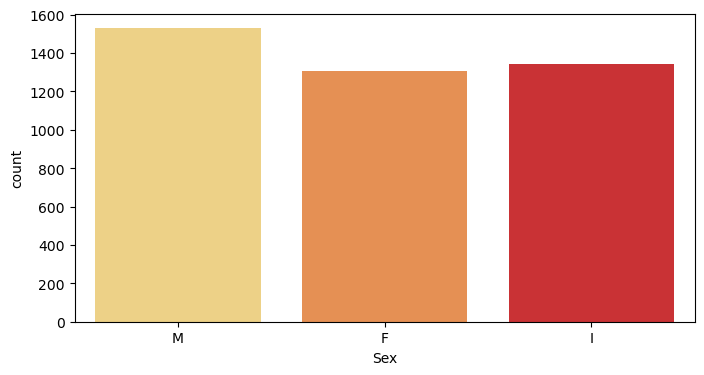

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sex', data=df , palette= "YlOrRd")

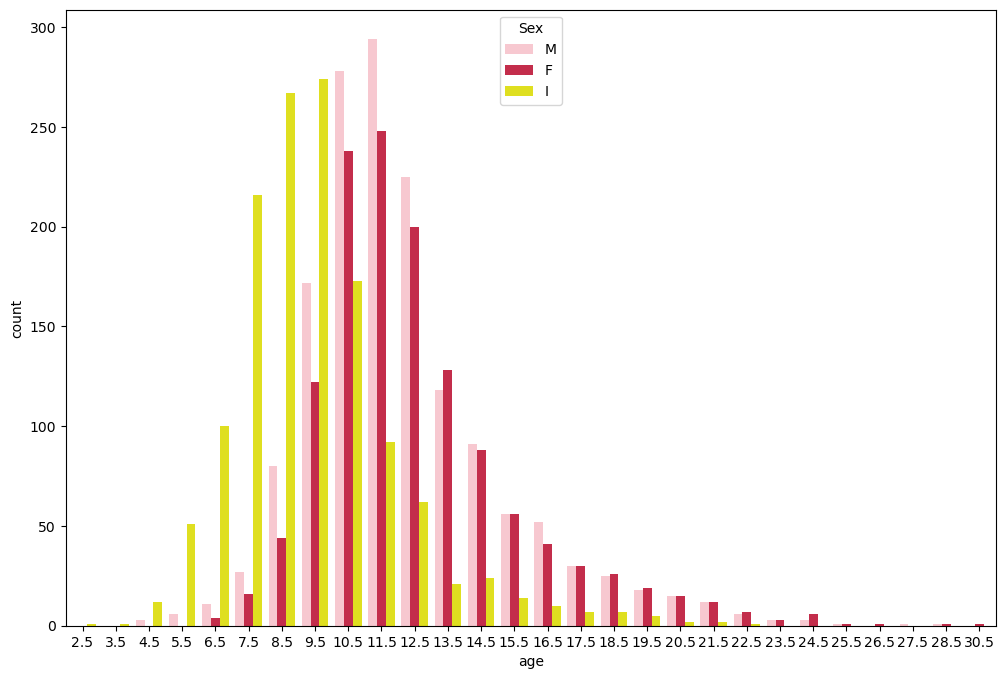

In [19]:
plt.figure(figsize=(12,8))
sn = sns.countplot(x='age',data=df, hue='Sex', palette=['pink','crimson',"Yellow"])

In [20]:
atributes_sex = df[['Sex','Length','Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight'	]].groupby('Sex').mean()
cols = ['Length','Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']
atributes_sex.columns = cols

In [21]:
list(atributes_sex.iloc[0])

[0.5790933435348126,
 0.4547322111706198,
 0.15801071155317523,
 1.0465321346595258,
 0.44618783473603674,
 0.23068859984697782,
 0.3020099464422341]

In [22]:
atributes_sex.columns.values

array(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'], dtype=object)

In [23]:
atributes_sex

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969


In [24]:
from plotly.offline import iplot
trace1 = go.Bar(
    y=list(atributes_sex.iloc[2]),
    x=atributes_sex.columns.values,
    name='Men',
    marker=dict(
        color='navy'
    )
)
trace2 = go.Bar(
    y=list(atributes_sex.iloc[0]),
    x=atributes_sex.columns.values,
    name='Women',
    marker=dict(
        color='mediumslateblue'
    )
)
trace3 = go.Bar(
    y=list(atributes_sex.iloc[1]),
    x=atributes_sex.columns.values,
    name='Infant',
    marker=dict(
        color='cornflowerblue'
    )
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    title='Features',
    font=dict(
        size=18
    ),
    legend=dict(
        font=dict(
            size=18
        )
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.show()

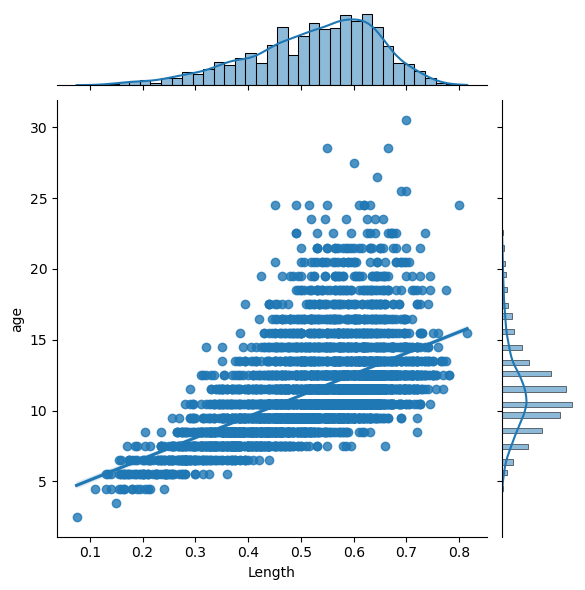

In [25]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
Y = df["Rings"]
sns.jointplot(x = "Length", y = "age", data=df, kind="reg")
plt.show()

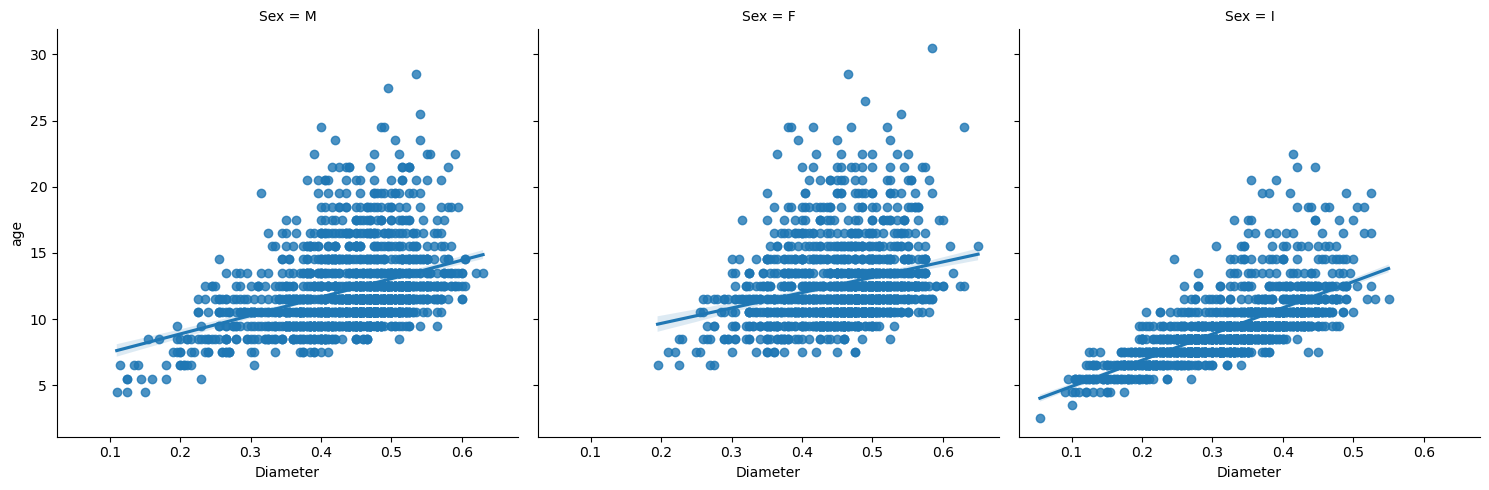

In [26]:
sns.lmplot(x='Diameter',y='age',data=df,col='Sex',palette = "red")

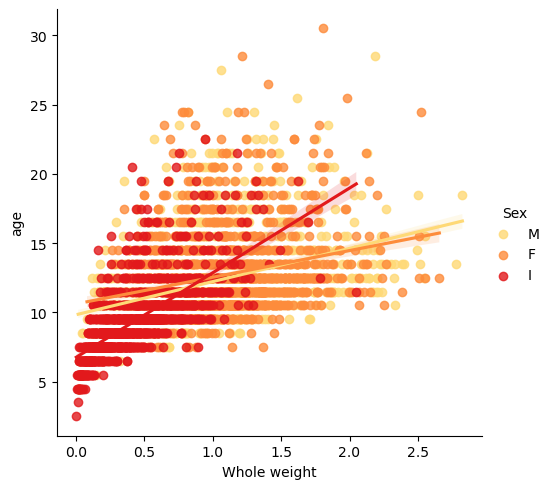

In [27]:
sns.lmplot(x='Whole weight',y='age',data=df ,hue = "Sex",palette = "YlOrRd")

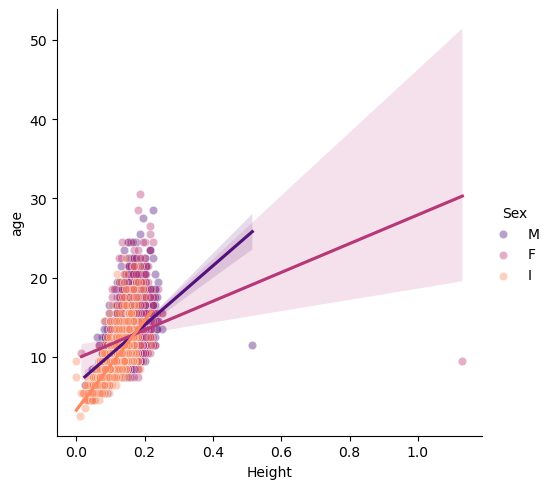

In [28]:
sns.lmplot(x = 'Height', y = 'age', data = df, hue = 'Sex', palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.4, 'linewidth':0.5})

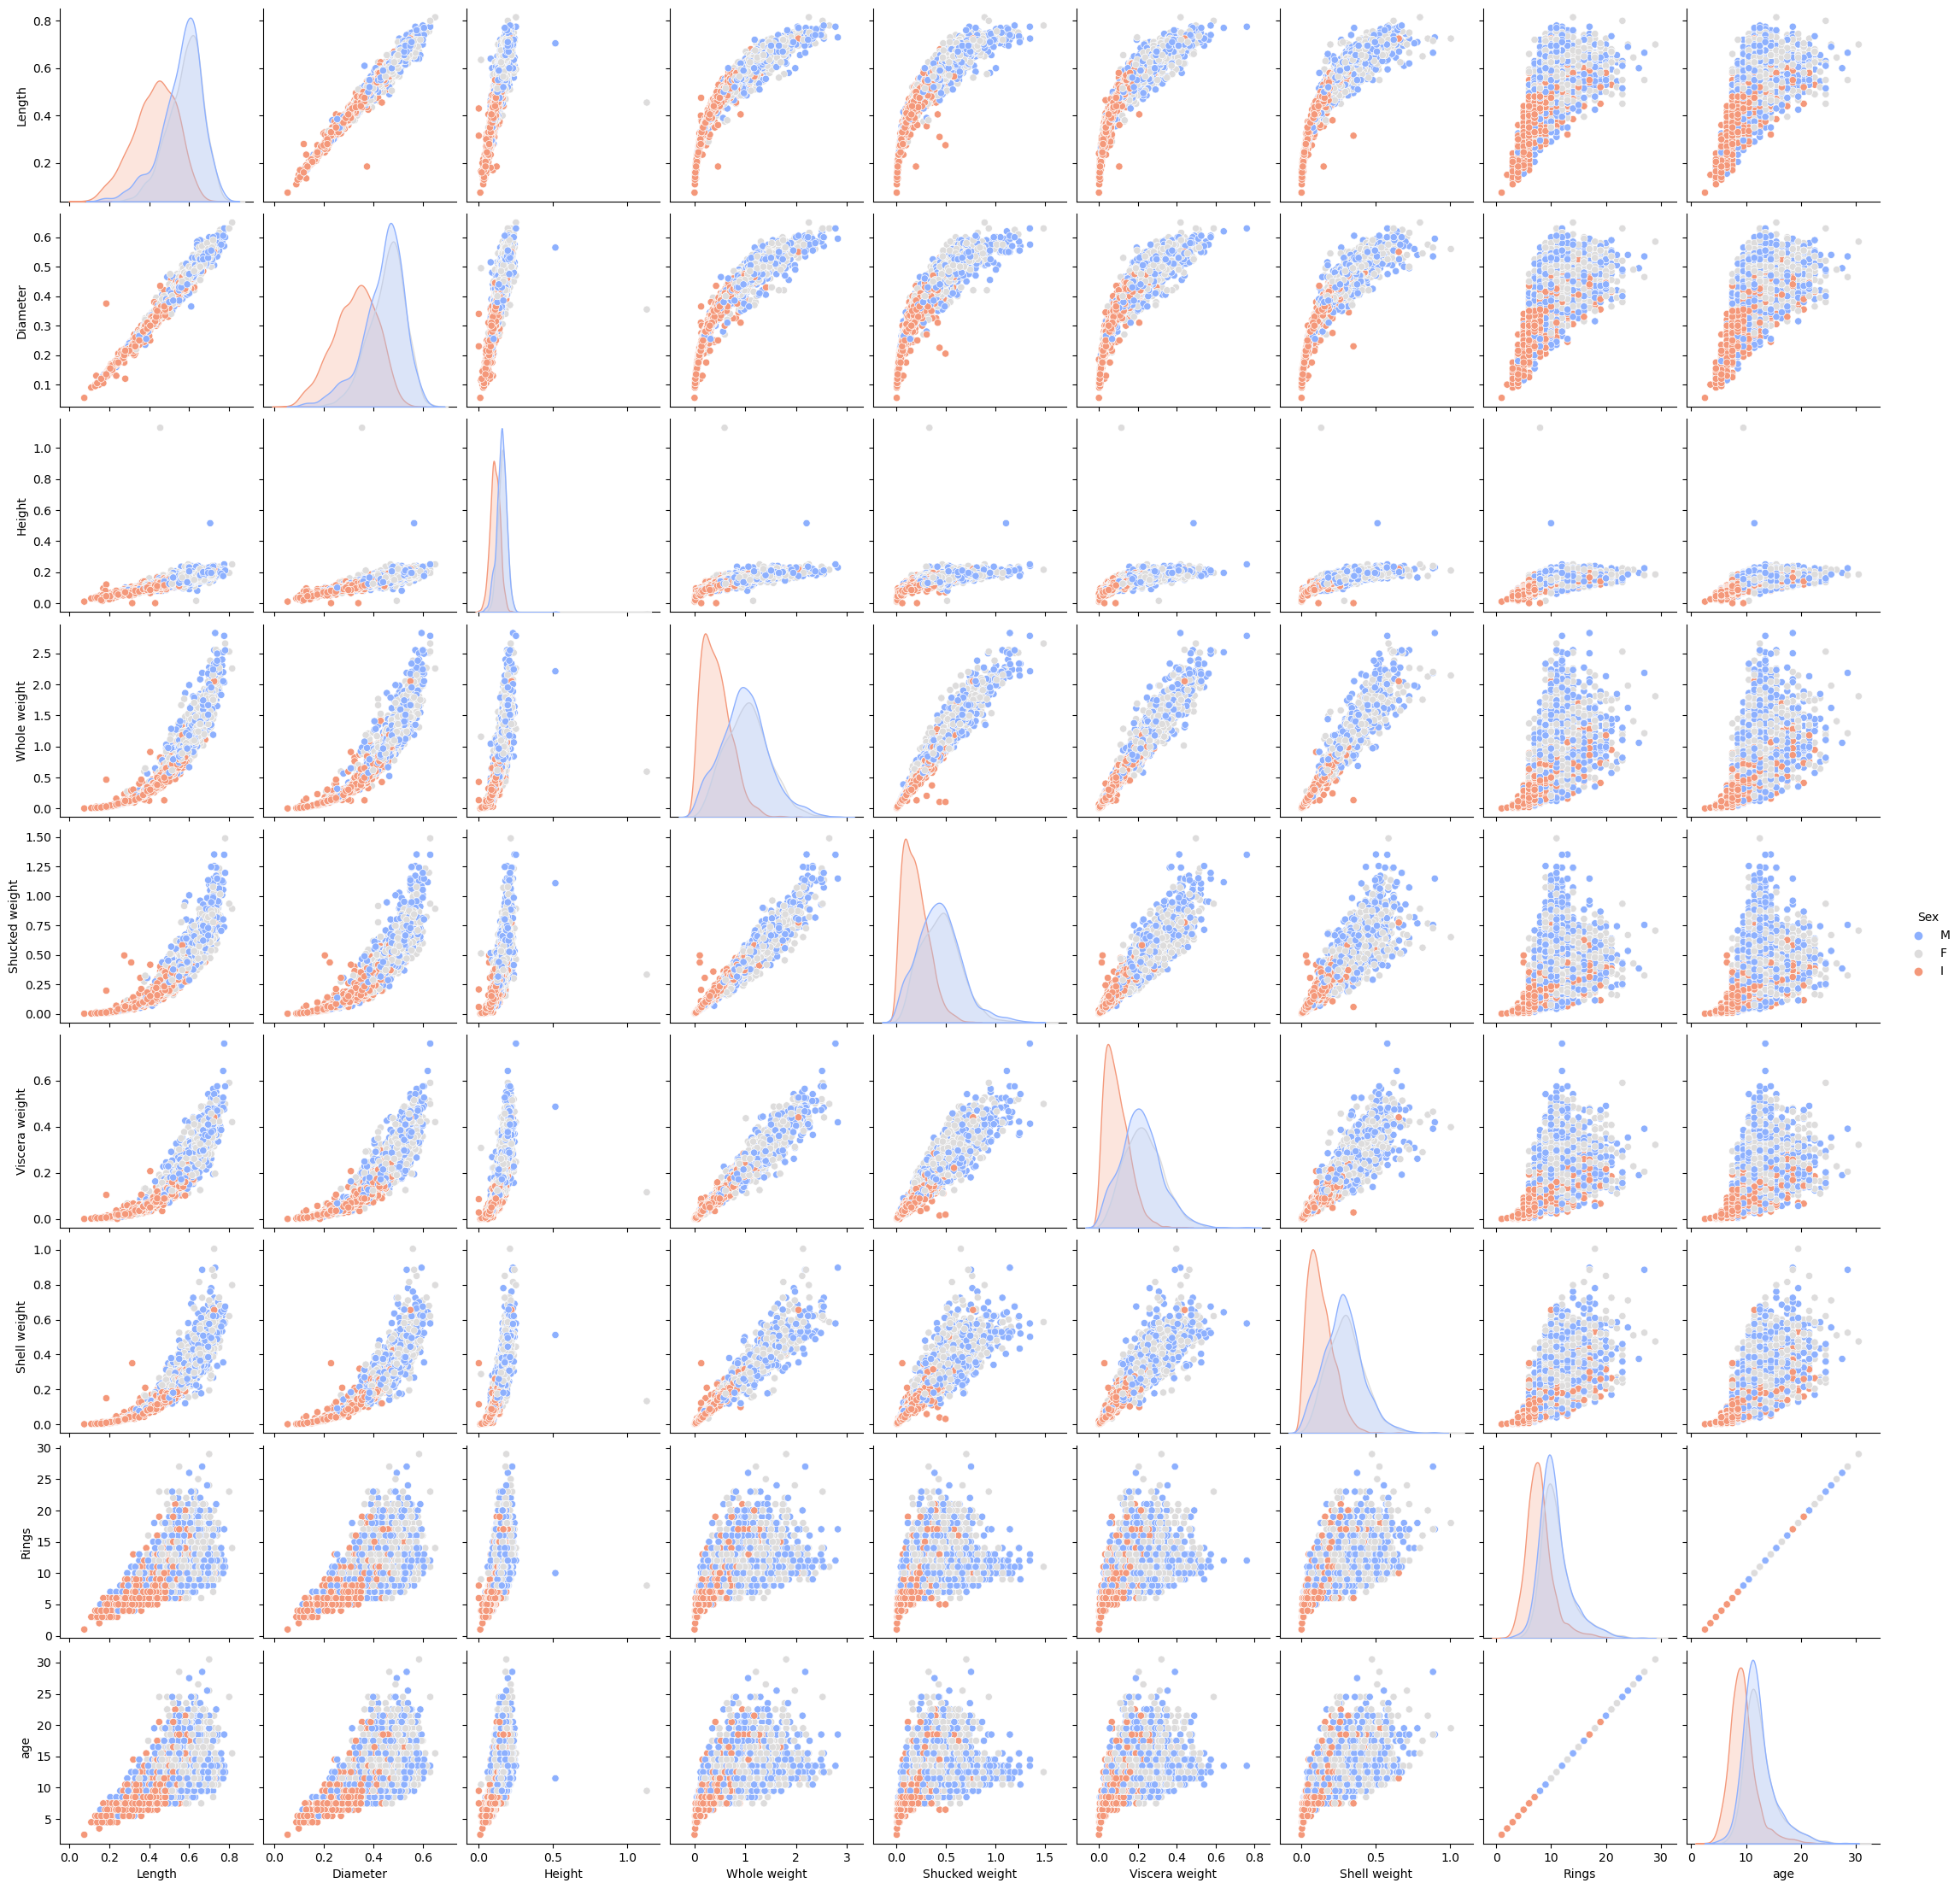

In [55]:
sns.pairplot(df,hue = "Sex",palette= "coolwarm")

# Heatmap
To Find Correlation :

<AxesSubplot:>

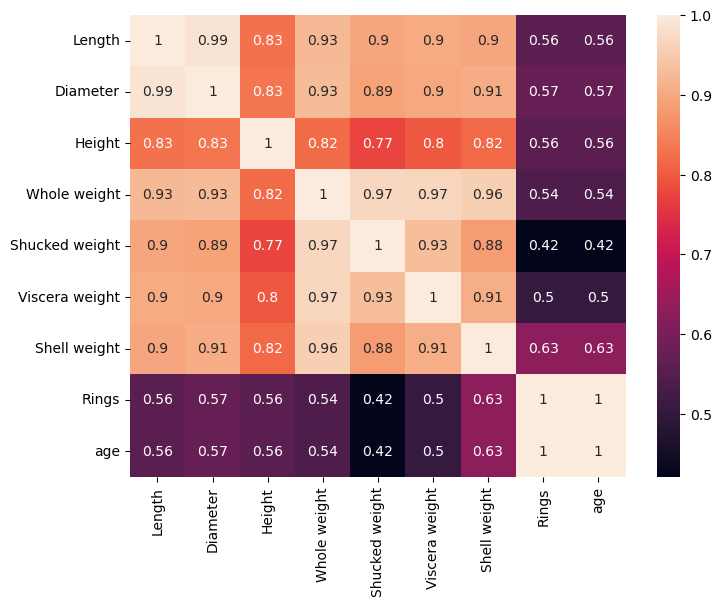

In [30]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

# Split data in Training and Test sets
We can split the data into training and validation sets and use Machine Learning to create an estimator that can learn from the training set and then check its performance on the test set.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [32]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1593,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
111,0.465,0.360,0.105,0.4310,0.1720,0.1070,0.1750
3271,0.520,0.425,0.155,0.7735,0.2970,0.1230,0.2550
1089,0.450,0.330,0.105,0.3715,0.1865,0.0785,0.0975
2918,0.600,0.445,0.135,0.9205,0.4450,0.2035,0.2530


# Scaling data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.0087207 , -0.29809198, -0.11953437, ..., -0.45497812,
        -0.21213327, -0.47094179],
       [-0.51010106, -0.50012949, -0.82192956, ..., -0.85203352,
        -0.68742939, -0.47094179],
       [-0.05050239,  0.15649242,  0.34872909, ..., -0.29437144,
        -0.54118443,  0.09719248],
       ...,
       [-0.13406579, -0.14656385, -0.3536661 , ..., -0.53082016,
        -0.44521117, -0.37861997],
       [ 0.40909627,  0.56056744, -0.47073197, ...,  0.68265253,
         0.33171518, -0.04484108],
       [ 0.57622305,  0.6615862 ,  0.46579495, ...,  0.82095273,
         0.44596906,  0.21081934]])

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Test score "+str(reg.score(X_test, y_test)))
print("Train score "+str(reg.score(X_train, y_train)))

Test score 0.511701692101147
Train score 0.5338369690495441


In [35]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=1, epsilon=.01).fit(X_train, y_train)
svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, y_train)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1).fit(X_train, y_train)

print("Test score for rbf :",str(svr_rbf.score(X_test, y_test)))
print("Test score for lin :",str(svr_rbf.score(X_test, y_test)))
print("Test score for poly :",str(svr_rbf.score(X_test, y_test)))

Test score for rbf : 0.5539422782469816
Test score for lin : 0.5539422782469816
Test score for poly : 0.5539422782469816


# DECISION TREE REGRESSOR
*We can visualize the results with a scatter-plot of the true age against the predicted age:*

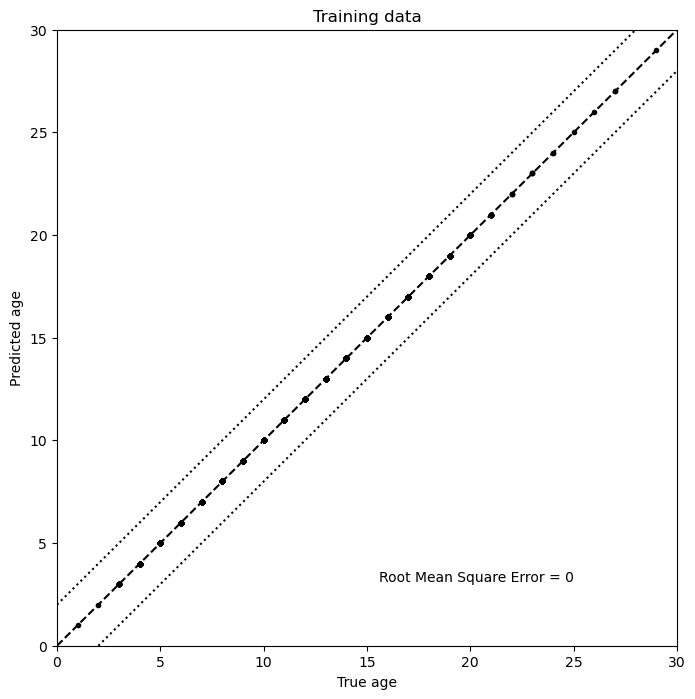

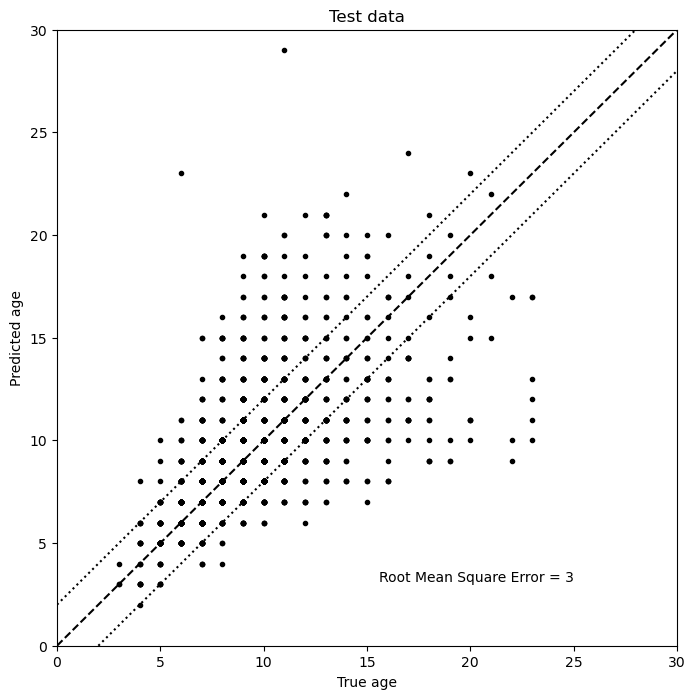

In [36]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(X_train,y_train)
# apply the model to the test and training data
predicted_test_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)
def scatter_y(y_test, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(y_test, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (y_test - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True age')
    ax.set_ylabel('Predicted age')
    
    return rms
scatter_y(y_train, predicted_train_y)
plt.title("Training data")
scatter_y(y_test, predicted_test_y)
plt.title("Test data");

# We specify a maximum depth of the decision tree of  10 , so that the estimator does not "specialize" too much on the training data.

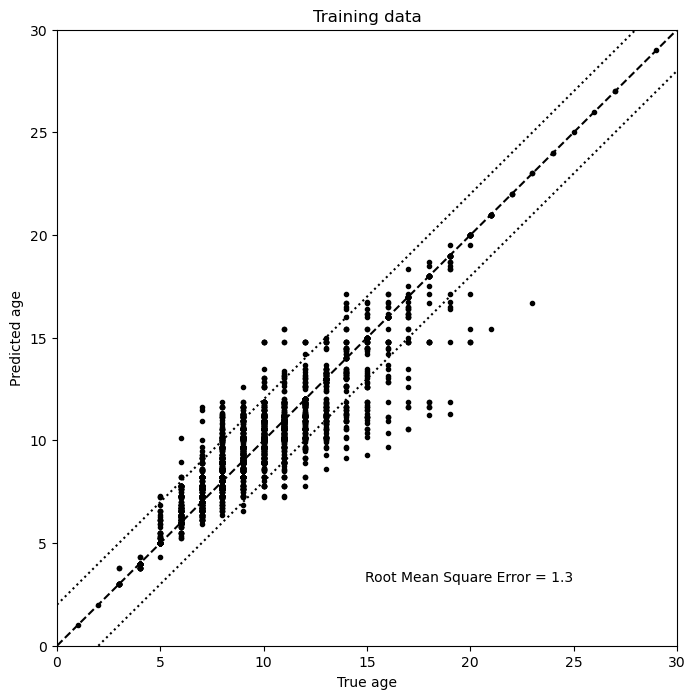

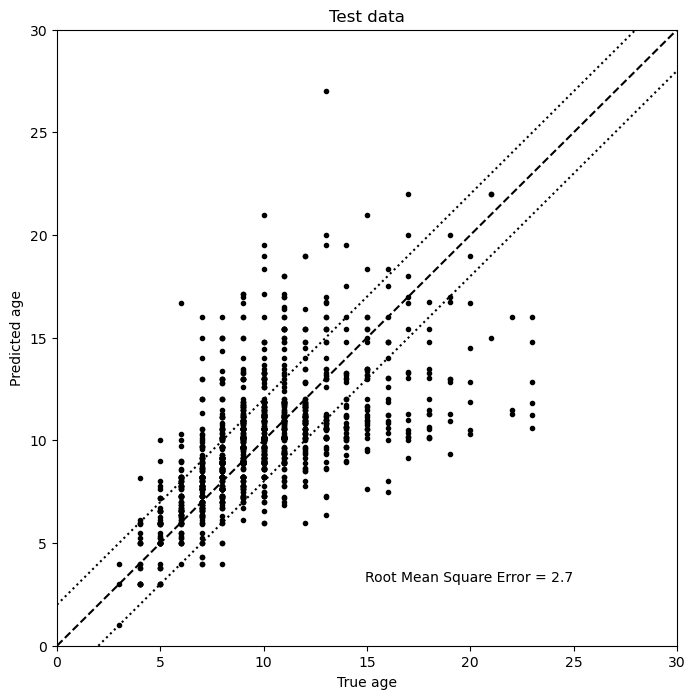

In [37]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(X_train,y_train)
# apply the model to the test and train data
predicted_test_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)

scatter_y(y_train, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(y_test, predicted_test_y)
plt.title("Test data");

# RANDOM FOREST REGRESSOR

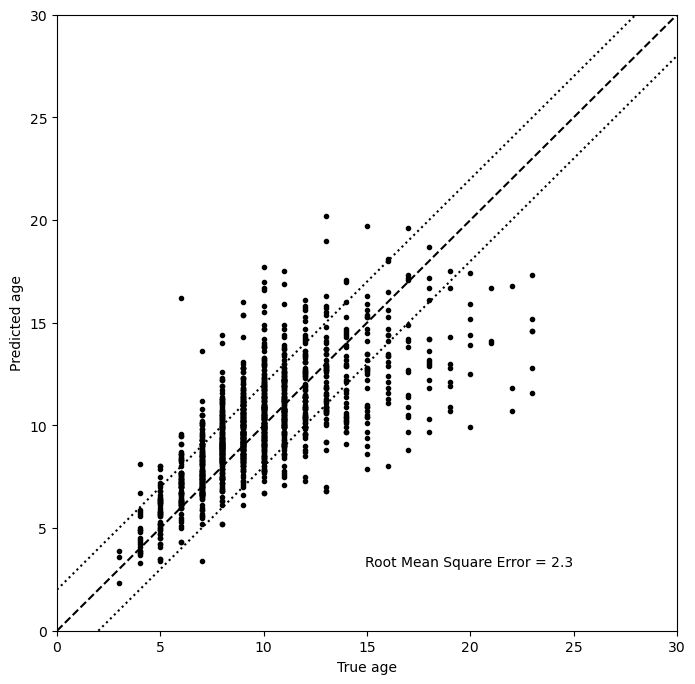

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
predicted_test_y = model.predict(X_test)
rms_random_forest = scatter_y(y_test, predicted_test_y)

In [39]:
df["age"].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: age, dtype: int64

In [40]:
df_1 = df.copy()
Age = []
for i in df_1["age"]:
    if i < 9.33:
        Age.append("1")
    if i > 9.33 and i< 18.66 :
        Age.append("2")
    if i > 18.66:
        Age.append("3")
df_1["Age"] = Age
df_1.drop("age" , axis =1,inplace=True)
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [41]:
X = df_1[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
Y = df_1["Age"]
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( X, Y, test_size=0.33, random_state=42)

In [42]:
scaler = StandardScaler()
scaler.fit_transform(X_train_1)

array([[-0.0087207 , -0.29809198, -0.11953437, ..., -0.45497812,
        -0.21213327, -0.47094179],
       [-0.51010106, -0.50012949, -0.82192956, ..., -0.85203352,
        -0.68742939, -0.47094179],
       [-0.05050239,  0.15649242,  0.34872909, ..., -0.29437144,
        -0.54118443,  0.09719248],
       ...,
       [-0.13406579, -0.14656385, -0.3536661 , ..., -0.53082016,
        -0.44521117, -0.37861997],
       [ 0.40909627,  0.56056744, -0.47073197, ...,  0.68265253,
         0.33171518, -0.04484108],
       [ 0.57622305,  0.6615862 ,  0.46579495, ...,  0.82095273,
         0.44596906,  0.21081934]])

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_1, y_train_1)
y_pred = clf.predict(X_test)
print("Test score "+str(clf.score(X_test_1, y_test_1)))
print("Train score "+str(clf.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.851341551849166
Train score 0.8573981415296641
Classification report :
              precision    recall  f1-score   support

           1       0.79      0.63      0.70       302
           2       0.86      0.95      0.91      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.85      1379
   macro avg       0.55      0.53      0.54      1379
weighted avg       0.82      0.85      0.83      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

Test score 0.8484408992023206
Train score 0.908506075768406
Classification report :
              precision    recall  f1-score   support

           1       0.78      0.69      0.73       302
           2       0.88      0.93      0.90      1034
           3       0.07      0.02      0.04        43

    accuracy                           0.85      1379
   macro avg       0.57      0.55      0.56      1379
weighted avg       0.83      0.85      0.84      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

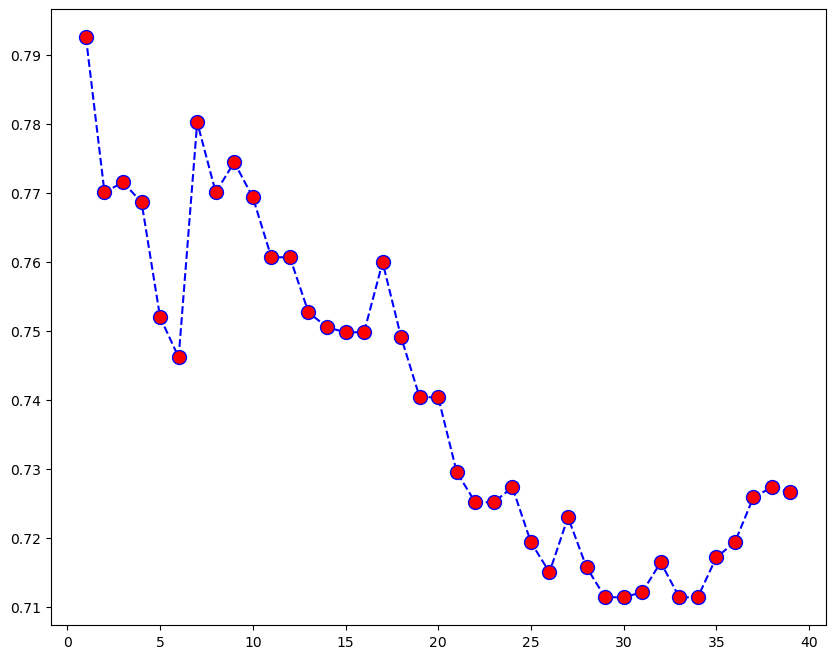

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_1, y_train_1)
y_pred = neigh.predict(X_test)
print("Test score "+str(neigh.score(X_test_1, y_test_1)))
print("Train score "+str(neigh.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.show()

In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))

regr.fit(X_train_1, y_train_1)

y_pred = regr.predict(X_test_1)
print("Test score "+str(regr.score(X_test_1, y_test_1)))
print("Train score "+str(regr.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.8578680203045685
Train score 0.8656182987848463
Classification report :
              precision    recall  f1-score   support

           1       0.80      0.65      0.72       302
           2       0.87      0.95      0.91      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.86      1379
   macro avg       0.56      0.54      0.54      1379
weighted avg       0.83      0.86      0.84      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_1, y_train_1)
y_pred = dtc.predict(X_test)
print("Test score "+str(dtc.score(X_test_1, y_test_1)))
print("Train score "+str(dtc.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))


Test score 0.8063814358230602
Train score 1.0
Classification report :
              precision    recall  f1-score   support

           1       0.70      0.65      0.67       302
           2       0.86      0.88      0.87      1034
           3       0.07      0.07      0.07        43

    accuracy                           0.81      1379
   macro avg       0.55      0.53      0.54      1379
weighted avg       0.80      0.81      0.80      1379



In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_1, y_train_1)
y_pred = clf.predict(X_test)
print("Test score "+str(clf.score(X_test_1, y_test_1)))
print("Train score "+str(clf.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.8491660623640319
Train score 0.8624017155110794
Classification report :
              precision    recall  f1-score   support

           1       0.76      0.66      0.71       302
           2       0.87      0.94      0.90      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.85      1379
   macro avg       0.54      0.53      0.54      1379
weighted avg       0.82      0.85      0.83      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_1, y_train_1)
y_pred = clf.predict(X_test)
print("Test score "+str(clf.score(X_test_1, y_test_1)))
print("Train score "+str(clf.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.8071065989847716
Train score 0.8037884203002145
Classification report :
              precision    recall  f1-score   support

           1       0.64      0.82      0.72       302
           2       0.91      0.83      0.87      1034
           3       0.21      0.28      0.24        43

    accuracy                           0.81      1379
   macro avg       0.59      0.64      0.61      1379
weighted avg       0.83      0.81      0.81      1379



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train_1, y_train_1)
y_pred = gbc.predict(X_test_1)
print("Test score "+str(gbc.score(X_test_1, y_test_1)))
print("Train score "+str(gbc.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.851341551849166
Train score 0.9245889921372409
Classification report :
              precision    recall  f1-score   support

           1       0.79      0.67      0.72       302
           2       0.87      0.94      0.90      1034
           3       0.15      0.05      0.07        43

    accuracy                           0.85      1379
   macro avg       0.61      0.55      0.57      1379
weighted avg       0.83      0.85      0.84      1379



# RESAMPLING DATA

In [50]:
from sklearn.utils import resample
X_ = pd.concat([X_train_1, y_train_1], axis=1)

# separate minority and majority classes
label1 = X_[X_.Age== "1"]
label2 = X_[X_.Age== "2"]
label3 = X_[X_.Age== "3"]
# upsample minority
label3_upsampled = resample(label3,
                          replace=True, # sample with replacement
                          n_samples=len(label2), # match number in majority class
                          random_state=27) # reproducible results
label1_upsampled = resample(label1,
                                replace = True, # sample without replacement
                                n_samples = len(label2), # match minority n
                                random_state = 27) # reproducible results

# combine majority and upsampled minority
sampled = pd.concat([label2,label1_upsampled,label3_upsampled])

# check new class counts
print(sampled.Age.value_counts())

y_train_s= sampled.Age
X_train_s = sampled.drop('Age', axis=1)

2    2168
1    2168
3    2168
Name: Age, dtype: int64


In [51]:
scaler = StandardScaler()
scaler.fit_transform(X_train_s)

array([[ 0.10275143, -0.1620625 , -0.08805704, ..., -0.33265516,
        -0.12443588, -0.44673713],
       [-0.34559339, -0.341194  , -0.73459285, ..., -0.73944839,
        -0.57421794, -0.44673713],
       [ 0.06538936,  0.24098337,  0.34296684, ..., -0.16810959,
        -0.43582346, -0.00808023],
       ...,
       [ 0.962079  ,  1.00229222,  0.77399072, ...,  0.82830528,
         0.80107723,  1.71913129],
       [ 0.99944107,  0.82316073,  1.63603847, ...,  0.42379741,
         0.47671516,  1.39013862],
       [ 0.36428591,  0.50968061, -0.30356898, ...,  0.0467138 ,
        -0.38392553,  0.64990511]])

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_s, y_train_s)
y_pred = clf.predict(X_test_1)
print("Test score "+str(clf.score(X_test_1, y_test_1)))
print("Train score "+str(clf.score(X_train_s, y_train_s)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.7316896301667876
Train score 0.7790590405904059
Classification report :
              precision    recall  f1-score   support

           1       0.63      0.88      0.73       302
           2       0.94      0.68      0.79      1034
           3       0.17      0.79      0.28        43

    accuracy                           0.73      1379
   macro avg       0.58      0.79      0.60      1379
weighted avg       0.85      0.73      0.76      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

Test score 0.7926033357505439
Train score 0.9587945879458795
Classification report :
              precision    recall  f1-score   support

           1       0.66      0.76      0.71       302
           2       0.89      0.83      0.86      1034
           3       0.12      0.21      0.16        43

    accuracy                           0.79      1379
   macro avg       0.56      0.60      0.57      1379
weighted avg       0.82      0.79      0.80      1379



C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rajat.sharma\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

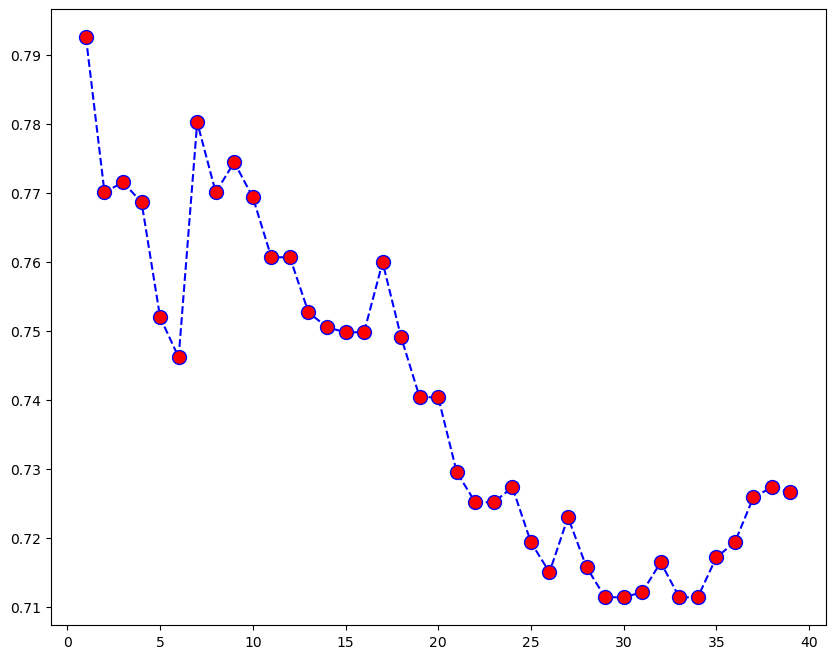

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_s, y_train_s)
y_pred = neigh.predict(X_test)
print("Test score "+str(neigh.score(X_test_1, y_test_1)))
print("Train score "+str(neigh.score(X_train_s, y_train_s)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.show()

In [54]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))

regr.fit(X_train_s, y_train_s)

y_pred = regr.predict(X_test_1)
print("Test score "+str(regr.score(X_test_1, y_test_1)))
print("Train score "+str(regr.score(X_train_s, y_train_s)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.7034082668600435
Train score 0.8273370233702337
Classification report :
              precision    recall  f1-score   support

           1       0.62      0.88      0.73       302
           2       0.94      0.65      0.77      1034
           3       0.14      0.77      0.24        43

    accuracy                           0.70      1379
   macro avg       0.57      0.76      0.58      1379
weighted avg       0.84      0.70      0.74      1379



In [56]:
# Creating Pickle for LogisticRegressionis Classifier
import pickle

# Save the model
with open('Abalone.pkl', 'wb') as file:
    pickle.dump(model, file)
